## Step 1: Loading the Dataset

Import The Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and display the dataset

In [ ]:
# Load the Adult dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult_data = pd.read_csv(url, names=column_names, na_values=' ?')

# Display the first few rows of the dataset
adult_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Step 2: Data Inspection

In [ ]:
# Get the dimensions of the dataset (number of rows and columns)
print("Dataset dimensions:", adult_data.shape)

Dataset dimensions: (32561, 15)


In [ ]:
# Get a summary of the dataset
print("Summary of the dataset:")
print(adult_data.info())

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
# Generate descriptive statistics for numerical features
print("Descriptive statistics for numerical features:")
adult_data.describe()

Descriptive statistics for numerical features:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Check the data types of each column
print("Data types of each column:")
print(adult_data.dtypes)

Data types of each column:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [ ]:
# Check distribution of the target variable
print("Distribution of the target variable ('income'):")
print(adult_data['income'].value_counts())

Distribution of the target variable ('income'):
income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64


In [ ]:
# Check unique values for categorical features
print("Unique values for categorical features:")
for column in adult_data.select_dtypes(include=['object']).columns:
    print(column + ":")
    print(adult_data[column].value_counts())
    print()

Unique values for categorical features:
workclass:
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education:
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status:
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [ ]:
# Check for missing values
missing_values = adult_data.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


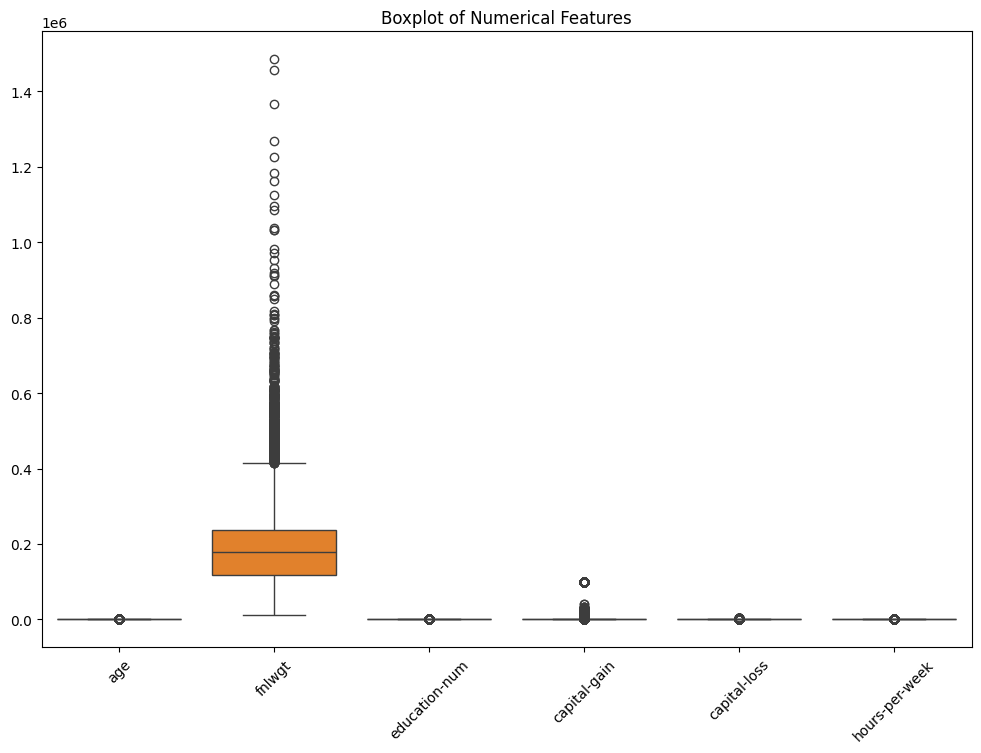

In [ ]:
# Check for outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=adult_data)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-d934ba66263a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adult_data, x='education', palette='pastel')


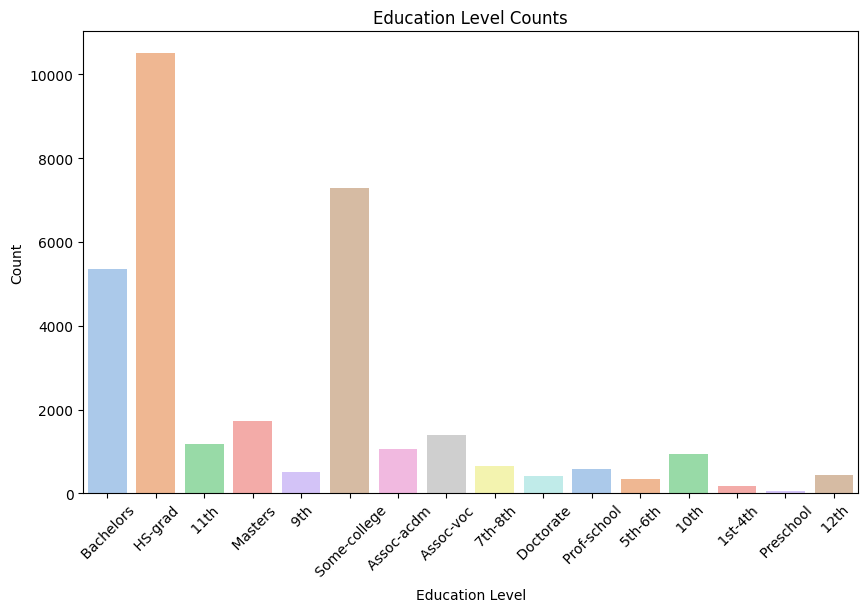

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_data, x='education', palette='pastel')
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## step03:Data Cleaning and preprocessing

Handling messing values

In [ ]:
# Impute missing values for categorical features
mode_workclass = adult_data['workclass'].mode()[0]
adult_data['workclass'].fillna(mode_workclass, inplace=True)

mode_occupation = adult_data['occupation'].mode()[0]
adult_data['occupation'].fillna(mode_occupation, inplace=True)

mode_native_country = adult_data['native-country'].mode()[0]
adult_data['native-country'].fillna(mode_native_country, inplace=True)

# Check if there are any remaining missing values
print(adult_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Checking for duplicates

In [ ]:
import pandas as pd

# Assuming 'adult_data' is your DataFrame containing the dataset

# Check for duplicates
duplicates = adult_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 24


In [ ]:
# Drop duplicate rows from the DataFrame
adult_data.drop_duplicates(inplace=True)

# Print the shape of the DataFrame to confirm that duplicate rows are removed
print("Shape after dropping duplicates:", adult_data.shape)


Shape after dropping duplicates: (32537, 15)


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = adult_data[adult_data['income'] == ' <=50K']
minority_class = adult_data[adult_data['income'] == ' >50K']

# Upsample minority class
minority_upsampled = resample(minority_class,
                               replace=True,     # sample with replacement
                               n_samples=len(majority_class),    # to match majority class
                               random_state=42) # reproducible results

# Combine majority class with upsampled minority class
adult_data = pd.concat([majority_class, minority_upsampled])

# Display new class counts
print(adult_data['income'].value_counts())
print(adult_data.head())

income
 <=50K    24698
 >50K     24698
Name: count, dtype: int64
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0  

drop unnecessary column

In [ ]:
# Drop the 'fnlwgt' column
adult_data.drop(columns=['fnlwgt'], inplace=True)

ckeck the columns we have

In [ ]:
adult_data_columns=adult_data.columns
print(adult_data.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


## Step04: Feature Engineering:

Encoding Categorical Features with LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder


# Colonnes catégorielles à encoder
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# Initialiser le OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')  # drop='None' pour éviter ne rien suuprimer c'est par défaut quand on ne le précise pas


# Appliquer OneHotEncoder et transformer les colonnes catégorielles
encoded_data = onehot_encoder.fit_transform(adult_data[categorical_columns])

# Convertir en DataFrame pour concaténation facile
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Réinitialiser les Index des deux DataFrames
adult_data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concaténer les colonnes encodées avec le reste des colonnes du DataFrame initial
adult_data_encoded = pd.concat([adult_data.drop(columns=categorical_columns), encoded_df], axis=1)

print(adult_data_encoded.head())

   age   education  education-num      sex  capital-gain  capital-loss  \
0   39   Bachelors             13     Male          2174             0   
1   50   Bachelors             13     Male             0             0   
2   38     HS-grad              9     Male             0             0   
3   53        11th              7     Male             0             0   
4   28   Bachelors             13   Female             0             0   

   hours-per-week  income  workclass_ Federal-gov  workclass_ Local-gov  ...  \
0              40   <=50K                     0.0                   0.0  ...   
1              13   <=50K                     0.0                   0.0  ...   
2              40   <=50K                     0.0                   0.0  ...   
3              40   <=50K                     0.0                   0.0  ...   
4              40   <=50K                     0.0                   0.0  ...   

   native-country_ Portugal  native-country_ Puerto-Rico  \
0             

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


mapping the categorical values in the 'sex' column to numerical values.

In [ ]:
# Map 'sex' column to numerical values (0 for Female, 1 for Male)
sex_mapping = {' Female': 0, ' Male': 1}
adult_data_encoded['sex'] = adult_data_encoded['sex'].map(sex_mapping)

mapping the categorical values in the target column 'income' to numerical values.

In [ ]:
# Convert 'income' column to binary labels (0 for <=50K and 1 for >50K)
adult_data_encoded['income'] = (adult_data_encoded['income'] == ' >50K').astype(int)

In [ ]:
adult_data_encoded.head()

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,Bachelors,13,1,2174,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Bachelors,13,1,0,0,13,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,HS-grad,9,1,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,11th,7,1,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,Bachelors,13,0,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Education Level Grouping with Hyphens

In [ ]:
print(adult_data_encoded['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Assoc-acdm'
 ' 7th-8th' ' Some-college' ' Assoc-voc' ' 5th-6th' ' 10th' ' 1st-4th'
 ' Preschool' ' 12th' ' Doctorate' ' Prof-school']


In [ ]:
# Define mapping dictionary for grouping education levels with hyphens
education_group_mapping = {
    ' Preschool': 'Primary-Education',
    ' 1st-4th': 'Primary-Education',
    ' 5th-6th': 'Primary-Education',
    ' 7th-8th': 'Secondary-Education',
    ' 9th': 'Secondary-Education',
    ' 10th': 'Secondary-Education',
    ' 11th': 'Secondary-Education',
    ' 12th': 'Secondary-Education',
    ' HS-grad': 'Post-Secondary-Education',
    ' Some-college': 'Post-Secondary-Education',
    ' Assoc-voc': 'Post-Secondary-Education',
    ' Assoc-acdm': 'Post-Secondary-Education',
    ' Bachelors': 'Higher-Education',
    ' Masters': 'Higher-Education',
    ' Prof-school': 'Higher-Education',
    ' Doctorate': 'Higher-Education'
}



# Map the 'education' column to broader categories with hyphens
adult_data_encoded['education'] = adult_data_encoded['education'].map(education_group_mapping)
adult_data_encoded.head()

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,Higher-Education,13,1,2174,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Higher-Education,13,1,0,0,13,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,Post-Secondary-Education,9,1,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,Secondary-Education,7,1,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,Higher-Education,13,0,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instancier un objet LabelEncoder
label_encoder = LabelEncoder()

# Appliquer LabelEncoder sur la colonne 'education' et mettre à jour les données
adult_data_encoded["education"] = label_encoder.fit_transform(adult_data_encoded["education"])

# Afficher les premières lignes du DataFrame
print(adult_data_encoded.head())

   age  education  education-num  sex  capital-gain  capital-loss  \
0   39          0             13    1          2174             0   
1   50          0             13    1             0             0   
2   38          1              9    1             0             0   
3   53          3              7    1             0             0   
4   28          0             13    0             0             0   

   hours-per-week  income  workclass_ Federal-gov  workclass_ Local-gov  ...  \
0              40       0                     0.0                   0.0  ...   
1              13       0                     0.0                   0.0  ...   
2              40       0                     0.0                   0.0  ...   
3              40       0                     0.0                   0.0  ...   
4              40       0                     0.0                   0.0  ...   

   native-country_ Portugal  native-country_ Puerto-Rico  \
0                       0.0                 

Plotting the distribution of the target variable 'income'

<ipython-input-26-dd8d0e61b9bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=adult_data_encoded, palette='Set2')


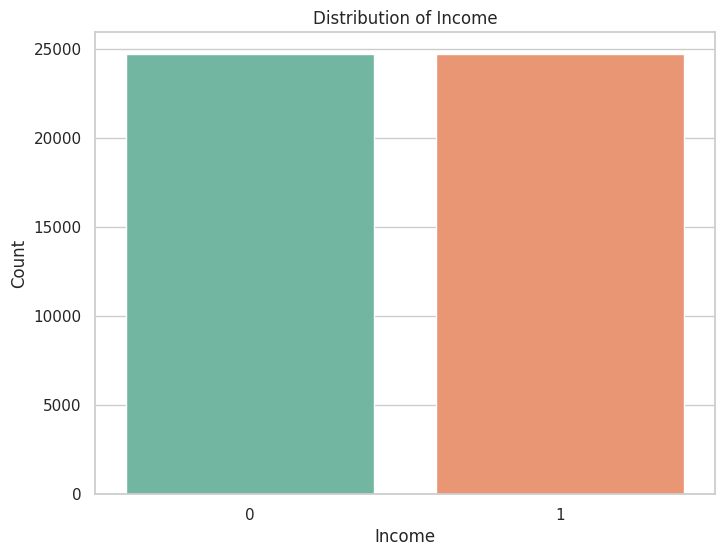

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the distribution of the target variable 'income'
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=adult_data_encoded, palette='Set2')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

creating a bar plot to show how age varies across different income levels in the dataset

<Axes: xlabel='income', ylabel='age'>

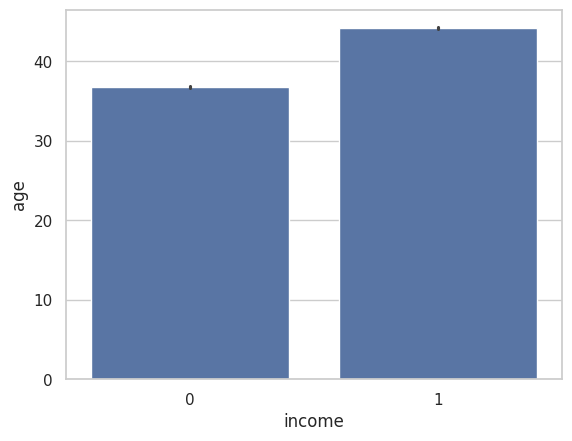

In [ ]:
#Visualizing Age Distribution by Income Level
sns.barplot(x="income",y="age",data=adult_data_encoded)

In [ ]:
# generating a heatmap to display the correlation between different features in the dataset
# augmenter la taille de la figure
#plt.figure(figsize=(70, 40))

# générer le heatmap avec des annotations et une palette de couleurs appropriée
#sns.heatmap(adult_data_encoded.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

# ajuster la taille de la police des annotations
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)

# ajouter un titre
#plt.title('Correlation Heatmap', fontsize=14)

# afficher le heatmap
#plt.show()

Apply the Scaling

scaling numerical features using the Min-Max scaler to ensure they fall within a specified range


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical features for scaling
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical features
adult_data_encoded[numerical_features] = scaler.fit_transform(adult_data_encoded[numerical_features])

# Display the first few rows of the scaled dataset
print(adult_data_encoded.head())


        age  education  education-num  sex  capital-gain  capital-loss  \
0  0.301370          0       0.800000    1       0.02174           0.0   
1  0.452055          0       0.800000    1       0.00000           0.0   
2  0.287671          1       0.533333    1       0.00000           0.0   
3  0.493151          3       0.400000    1       0.00000           0.0   
4  0.150685          0       0.800000    0       0.00000           0.0   

   hours-per-week  income  workclass_ Federal-gov  workclass_ Local-gov  ...  \
0        0.397959       0                     0.0                   0.0  ...   
1        0.122449       0                     0.0                   0.0  ...   
2        0.397959       0                     0.0                   0.0  ...   
3        0.397959       0                     0.0                   0.0  ...   
4        0.397959       0                     0.0                   0.0  ...   

   native-country_ Portugal  native-country_ Puerto-Rico  \
0             

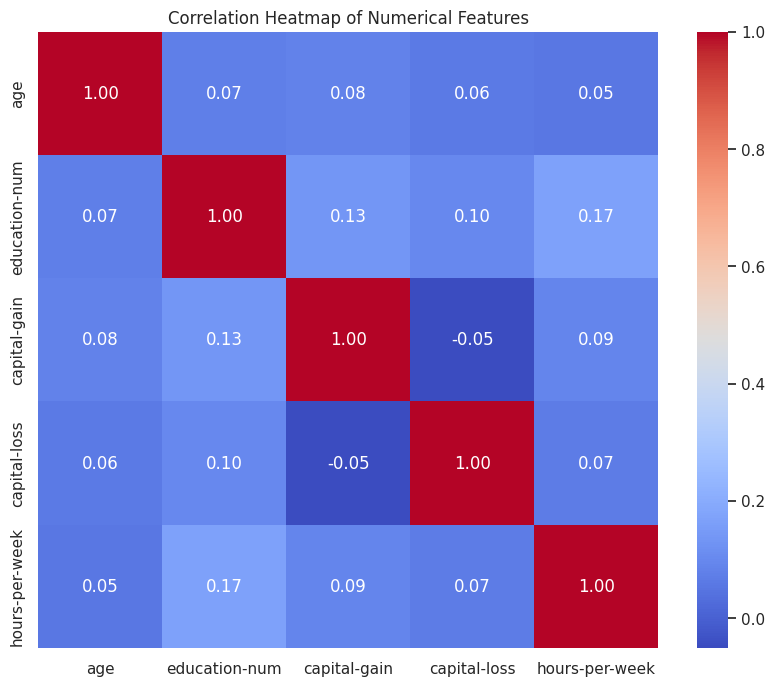

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(adult_data_encoded[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Trying classification algorithms before scalling



1.   Logistic Regression




Algorithm: Logistic Regression
Test Accuracy: 0.8139676113360323
Precision: 0.8154290589902669
Recall: 0.8139676113360323
F1-score: 0.8137418732841641
ROC-AUC Score: 0.8139257855942681
Confusion Matrix:
 [[3846 1088]
 [ 750 4196]]


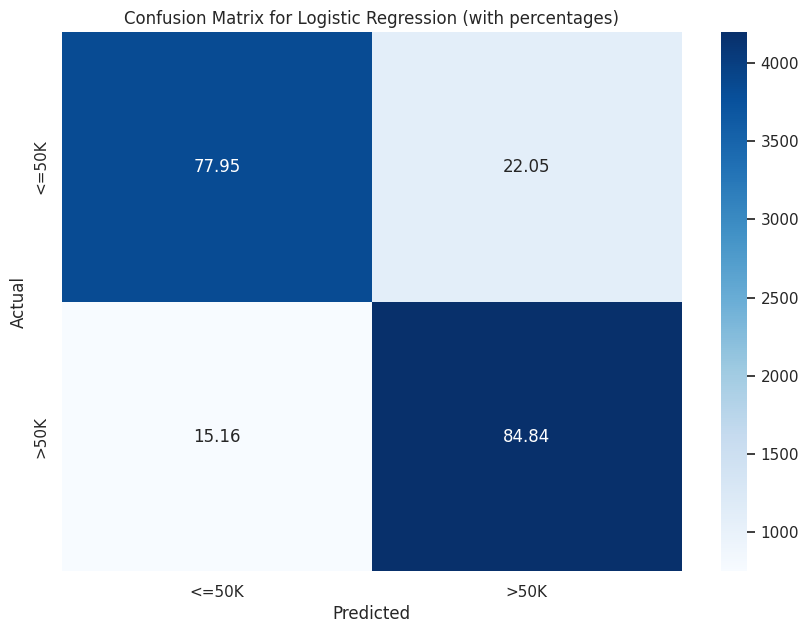

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Supposons que 'adult_data_encoded' contient notre dataset encodé
X = adult_data_encoded.drop(columns=['income'])  # Features
y = adult_data_encoded['income']  # Variable cible

# Division des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement du modèle de régression logistique
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = logistic_regression_model.predict(X_test)

# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcul des pourcentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Affichage des résultats
print("Algorithm: Logistic Regression")
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Tracé de la matrice de confusion avec les pourcentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=conf_matrix_percent, fmt='.2f', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (with percentages)')
plt.show()


2. Random forest algorithm

Algorithm: Random Forest
Test Accuracy: 0.912246963562753
Precision: 0.9158911294137552
Recall: 0.912246963562753
F1-score: 0.9120487981526382
ROC-AUC Score: 0.9121899161942083
Confusion Matrix:
 [[4269  665]
 [ 202 4744]]


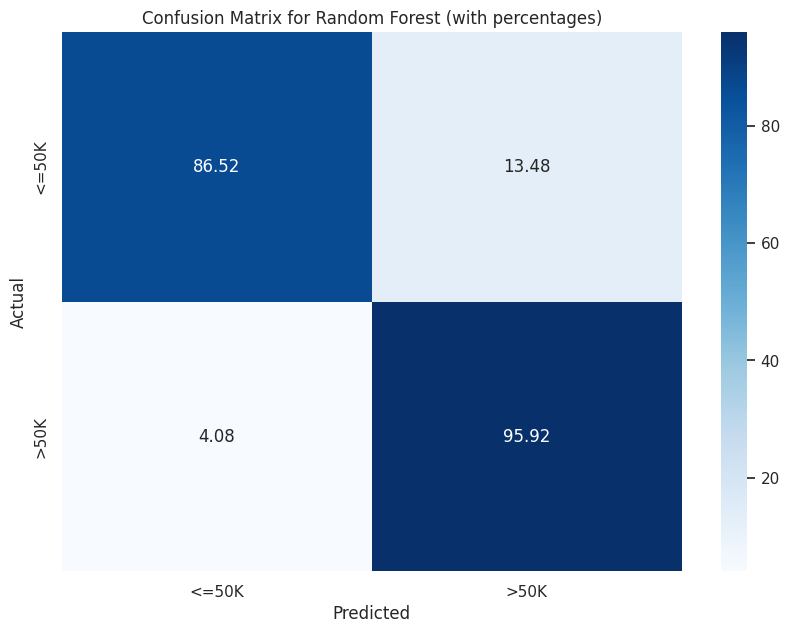

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages for the confusion matrix
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Print the metrics
print("Algorithm: Random Forest")
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest (with percentages)')
plt.show()


3. SVM

Algorithm: SVM
Test Accuracy: 0.8078947368421052
Precision: 0.8121718104345775
Recall: 0.8078947368421052
F1-score: 0.8072165691072739
ROC-AUC Score: 0.8965430008502036
Confusion Matrix:
 [[3695 1239]
 [ 659 4287]]


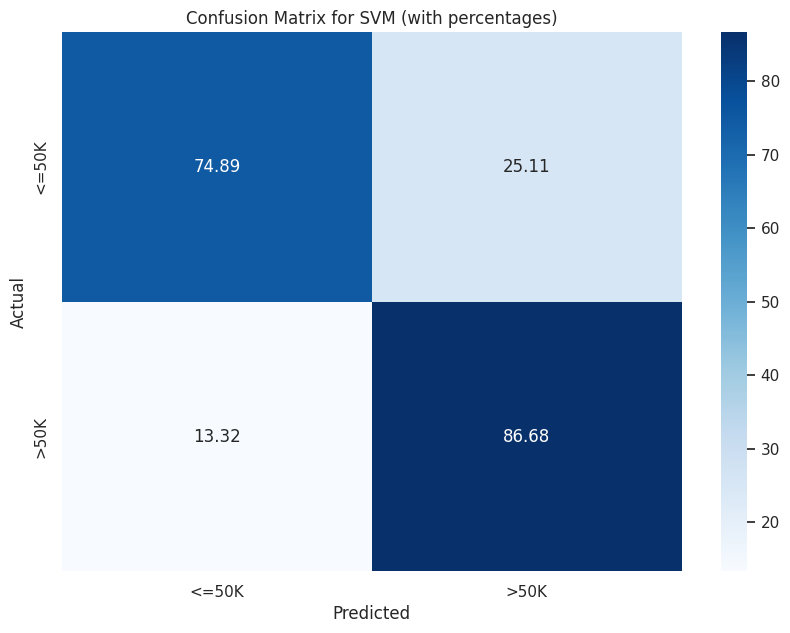

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification

# Supposons que 'X' et 'y' sont vos features et target variable respectivement
# Pour l'exemple, nous allons créer un jeu de données simulé
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM classifier
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Handle ROC-AUC Score
# For binary classification
if len(np.unique(y)) == 2:
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
else:
    # For multiclass classification
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages for the confusion matrix
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Print the metrics
print("Algorithm: SVM")
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM (with percentages)')
plt.show()


4. decision tree

Algorithm: Decision Tree
Test Accuracy: 0.9017206477732793
Precision: 0.905884259238078
Recall: 0.9017206477732793
F1-score: 0.9014611844784204
ROC-AUC Score: 0.9190479923342345
Confusion Matrix:
 [[4198  736]
 [ 235 4711]]


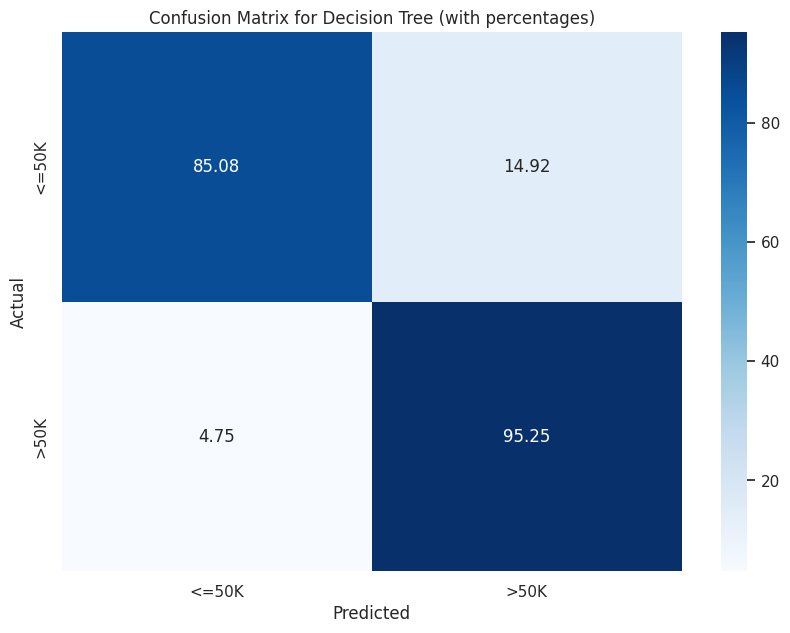

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Supposons que 'X' et 'y' sont vos features et target variable respectivement
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)
y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]  # Probabilités nécessaires pour le calcul du ROC-AUC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages for the confusion matrix
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Print the metrics
print("Algorithm: Decision Tree")
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree (with percentages)')
plt.show()


5. K-nearest neighbor

Algorithm: KNN
Test Accuracy: 0.81
Precision: 0.8201461840911383
Recall: 0.81
F1-score: 0.8098479847984799
ROC-AUC Score: 0.8824741232036981
Confusion Matrix:
 [[82 11]
 [27 80]]


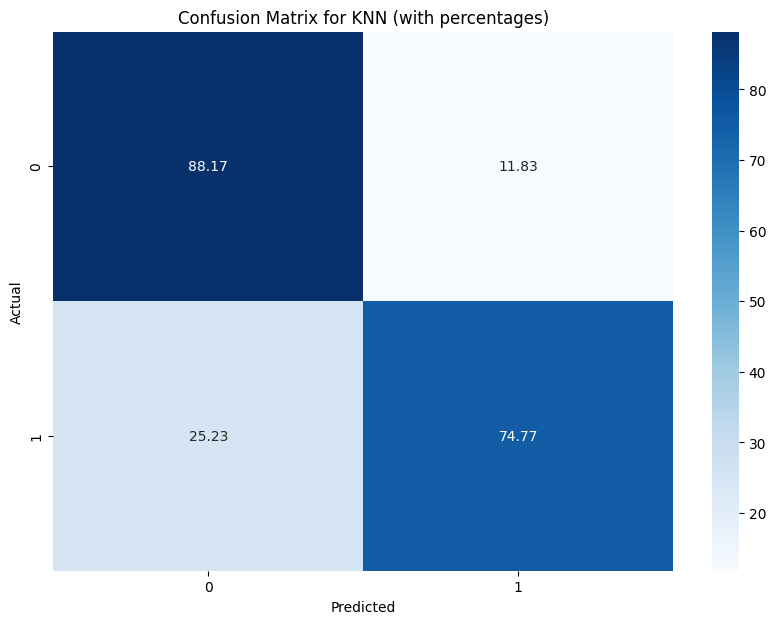

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification

# Supposons que 'X' et 'y' sont vos features et target variable respectivement
# Pour l'exemple, nous allons créer un jeu de données simulé
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Handle ROC-AUC Score
# For binary classification
if len(np.unique(y)) == 2:
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
else:
    # For multiclass classification
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages for the confusion matrix
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Print the metrics
print("Algorithm: KNN")
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (with percentages)')
plt.show()


6.Naive bayes

Test Accuracy (Naive Bayes): 0.795
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.89      0.70      0.79       107

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200



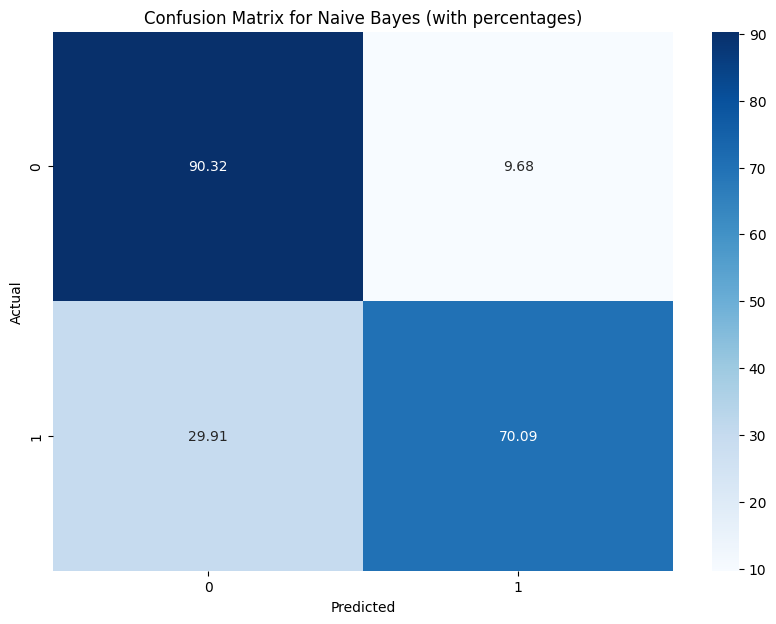

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Supposons que 'X' et 'y' sont vos features et target variable respectivement
# Pour l'exemple, nous allons créer un jeu de données simulé
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (Naive Bayes):", test_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages for the confusion matrix
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes (with percentages)')
plt.show()


# **4)Arbre de Décision Augmenté (Gradient Boosting)

Gradient Boosting Accuracy: 0.91
Gradient Boosting Precision: 0.9166766917293233
Gradient Boosting Recall: 0.91
Gradient Boosting F1-Score: 0.9100540054005399
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        93
           1       0.97      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200



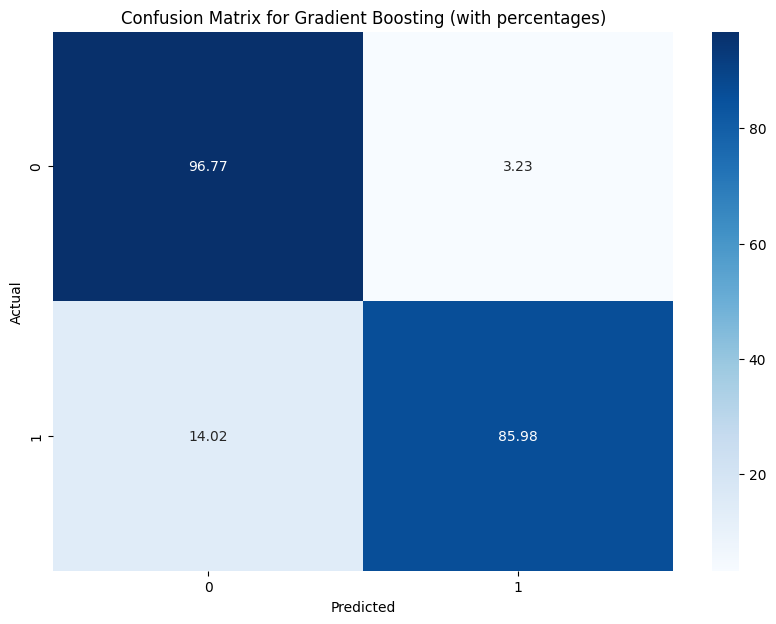

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Supposons que 'X' et 'y' sont vos features et target variable respectivement
# Pour l'exemple, nous allons créer un jeu de données simulé
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting classifier
dt_model = GradientBoostingClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Gradient Boosting Accuracy:", accuracy_dt)
print("Gradient Boosting Precision:", precision_dt)
print("Gradient Boosting Recall:", recall_dt)
print("Gradient Boosting F1-Score:", f1_dt)

# Print classification report
print(classification_report(y_test, y_pred_dt))

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate percentages for the confusion matrix
conf_matrix_percent_dt = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent_dt, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting (with percentages)')
plt.show()


#Step06:  Predictive system


Used example : 39, State-gov, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States